<a href="https://colab.research.google.com/github/Anuraggupta07/-CropInsight/blob/main/FinalUAVprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing all the neccessary libraries

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Mounting everything from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# All data visvualization and cleaning techniques

df = pd.read_csv('/content/drive/MyDrive/DATASET UAV/crop_recommendation.csv')
print("df shape:", df.shape)
print("Column names:", df.columns)

df shape: (2200, 8)
Column names: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [8]:
df['rainfall'] = (df['rainfall'] - df['rainfall'].min()) / (df['rainfall'].max() - df['rainfall'].min())*100
df.rename(columns={'rainfall': 'moisture'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   moisture     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
moisture       False
label          False
dtype: bool

In [12]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
diag_gr = df.groupby('label', axis=0)
df_count=pd.DataFrame(diag_gr.size(), columns=['# of observations'])
print(df_count)

             # of observations
label                         
apple                      100
banana                     100
blackgram                  100
chickpea                   100
coconut                    100
coffee                     100
cotton                     100
grapes                     100
jute                       100
kidneybeans                100
lentil                     100
maize                      100
mango                      100
mothbeans                  100
mungbean                   100
muskmelon                  100
orange                     100
papaya                     100
pigeonpeas                 100
pomegranate                100
rice                       100
watermelon                 100


In [10]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame with a column named 'label'
le = LabelEncoder()

# Create a new DataFrame 'mapping_df' with just the 'label' column
mapping_df = df[['label']].copy()

# Encode the 'label' column and store the encoded values in 'label_encoded'
mapping_df['label_encoded'] = le.fit_transform(df['label'].values)

In [14]:
mapping_df
d1 = mapping_df.drop_duplicates('label').set_index('label')
print(d1)

             label_encoded
label                     
rice                    20
maize                   11
chickpea                 3
kidneybeans              9
pigeonpeas              18
mothbeans               13
mungbean                14
blackgram                2
lentil                  10
pomegranate             19
banana                   1
mango                   12
grapes                   7
watermelon              21
muskmelon               15
apple                    0
orange                  16
papaya                  17
coconut                  4
cotton                   6
jute                     8
coffee                   5


In [15]:
df = df.dropna()

# Encode the 'label' column
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
X = df.drop('label', axis=1)
y = df['label']

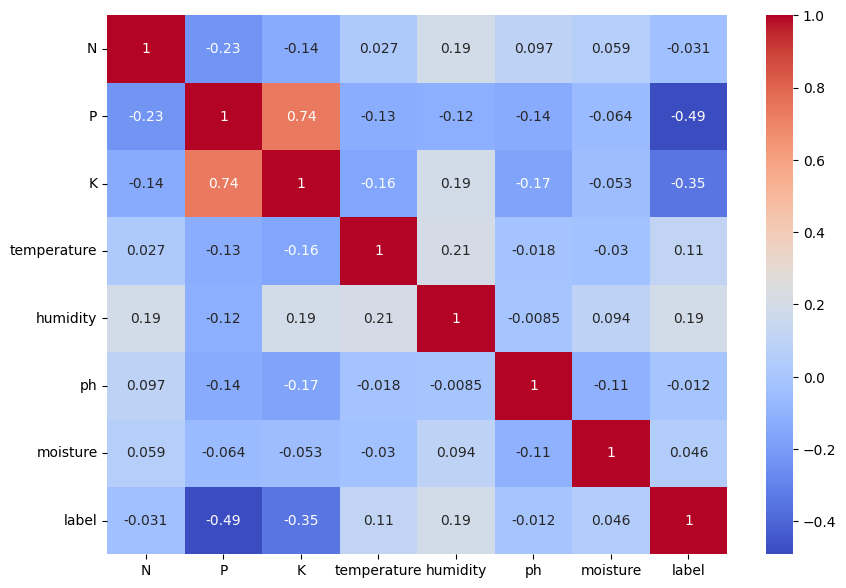

In [16]:
# Plotting a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
models = [
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]})
]

# Initialize best_model and best_accuracy
best_model = None
best_accuracy = 0

In [19]:
 #Train, tune and evaluate each model
for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    if accuracy > best_accuracy:
        best_model = grid_search.best_estimator_
        best_accuracy = accuracy

# Print the best model and its accuracy
print('Best model:', best_model)
print('Best accuracy:', best_accuracy)

Random Forest Accuracy: 98.94%
KNN Accuracy: 96.82%
Best model: RandomForestClassifier()
Best accuracy: 0.9893939393939394


In [20]:
# Since we can see that the Best model : RandomForest Classifier,
# Therefore we proceed with RF!

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.990909090909091


In [24]:
# Training the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# User input
user_input = input("Enter your input (separate each feature by a space): ")
user_input = user_input.split()
user_input = np.array(user_input).reshape(1, -1)

label_mapping = {
        0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton',
        7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans',
        14: 'mungbeans', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate',
        20: 'rice', 21: 'watermelon'
    }

# Making prediction
prediction = model.predict(user_input)
predicted_class = label_mapping[prediction[0]]

# Print the predicted class
print("Predicted class:", predicted_class)

# UAV Crop Recommendation function
def uav_crop_recommendation(model):
    print("UAV Data Collection...")
    uav_data = np.random.randint(0, 100, size=(2800, X_train.shape[1]))  # Replace with actual UAV data
    uav_predictions = model.predict(uav_data)
    print("UAV Data Shape:", uav_data.shape)

    label_mapping = {
        0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton',
        7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans',
        14: 'mungbeans', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate',
        20: 'rice', 21: 'watermelon'
    }

    predicted_crops = [label_mapping[prediction] for prediction in uav_predictions]
    print("Predicted Crop Recommendations:")
    print(predicted_crops)

    user_input = input("Enter the values for features (separate each feature by a space): ")
    user_input = [float(val) for val in user_input.split()]
    user_input = np.array(user_input).reshape(1, -1)

    user_prediction = model.predict(user_input)
    predicted_crop = label_mapping[user_prediction[0]]
    print("Predicted Crop Recommendation for User Input:", predicted_crop)

if __name__ == "__main__":
    uav_crop_recommendation(model)

Accuracy: 0.9924242424242424
Enter your input (separate each feature by a space): 2 3 4 5 6 7 7.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted class: mothbeans
UAV Data Collection...
UAV Data Shape: (2800, 7)
Predicted Crop Recommendations:
['maize', 'coffee', 'chickpea', 'papaya', 'pigeonpeas', 'watermelon', 'banana', 'coconut', 'papaya', 'chickpea', 'papaya', 'pigeonpeas', 'coffee', 'coffee', 'chickpea', 'pomegranate', 'coffee', 'kidneybeans', 'chickpea', 'mungbeans', 'maize', 'chickpea', 'chickpea', 'chickpea', 'chickpea', 'chickpea', 'coconut', 'mothbeans', 'kidneybeans', 'papaya', 'pigeonpeas', 'muskmelon', 'mothbeans', 'chickpea', 'chickpea', 'pigeonpeas', 'orange', 'chickpea', 'papaya', 'papaya', 'papaya', 'pigeonpeas', 'pigeonpeas', 'chickpea', 'maize', 'chickpea', 'mothbeans', 'chickpea', 'kidneybeans', 'muskmelon', 'coffee', 'pigeonpeas', 'watermelon', 'chickpea', 'coffee', 'chickpea', 'coffee', 'coffee', 'chickpea', 'papaya', 'coffee', 'pomegranate', 'pomegranate', 'coffee', 'chickpea', 'coffee', 'coffee', 'papaya', 'chickpea', 'mango', 'muskmelon', 'papaya', 'kidneybeans', 'rice', 'chickpea', 'coffee', '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
